# A]  Apply Simple Linear Regression On                US House Pricing Dataset

            

In [193]:
import pandas as pd

In [194]:
import numpy as np

In [195]:
import matplotlib.pyplot as plt

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [197]:
data=pd.read_csv(r"C:\Users\ds3\Downloads\USA_Housing.csv")
                from sklearn.model_selection import train_test_split

In [198]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [200]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [201]:
colnames=data.columns

In [202]:
colnames

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [203]:
data[colnames].isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [204]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [205]:
#independent variable=Avg. Area Income
#target/dependent variable=Price

In [206]:
x = data.iloc[:, 0:1].values

In [207]:
x

array([[79545.45857],
       [79248.64245],
       [61287.06718],
       ...,
       [63390.68689],
       [68001.33124],
       [65510.5818 ]])

In [208]:
y=data.iloc[:,5:6].values

In [209]:
y

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

dividing the dataset into train and test dataset

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [211]:
#Implement classifier based on Simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [212]:
predictions=model.predict(x_test)
predictions

array([[1075510.99387527],
       [1121824.10155187],
       [1288108.0623983 ],
       [ 844869.12634566],
       [ 933916.06204117],
       [1420912.70044229],
       [ 711979.49700164],
       [1026088.5790416 ],
       [1708028.61948045],
       [1428676.62079602],
       [1240208.11112218],
       [1359860.09768004],
       [1728427.94164162],
       [1138394.20108417],
       [1272483.8242328 ],
       [ 927348.313966  ],
       [1318528.90419132],
       [ 907415.62033738],
       [1406543.40562784],
       [1479733.08651557],
       [1388942.24120432],
       [1143520.56296575],
       [1260318.45058443],
       [ 961495.63607922],
       [1186060.36882107],
       [1035040.80003979],
       [1324453.0228585 ],
       [1311973.41159658],
       [1505513.37078201],
       [1291252.83758278],
       [1139096.35896178],
       [1681298.27737016],
       [ 705861.6943703 ],
       [1395751.14522628],
       [1307044.59790501],
       [1188299.71913861],
       [1163744.79851972],
 

In [213]:
p=model.predict([[61200.72618]])
p

array([[1075510.99387527]])

In [214]:
x_test

array([[ 61200.72618],
       [ 63380.81467],
       [ 71208.2693 ],
       [ 50343.76352],
       [ 54535.45372],
       [ 77459.75786],
       [ 44088.27418],
       [ 58874.27384],
       [ 90975.11327],
       [ 77825.22747],
       [ 68953.48361],
       [ 74585.8398 ],
       [ 91935.36685],
       [ 64160.81595],
       [ 70472.79238],
       [ 54226.29131],
       [ 72640.26405],
       [ 53288.00325],
       [ 76783.35466],
       [ 80228.59919],
       [ 75954.81825],
       [ 64402.12825],
       [ 69900.13396],
       [ 55833.70199],
       [ 66404.59679],
       [ 59295.68011],
       [ 72919.12901],
       [ 72331.67854],
       [ 81442.14982],
       [ 71356.30273],
       [ 64193.8685 ],
       [ 89716.84074],
       [ 43800.29197],
       [ 76275.33255],
       [ 72099.66539],
       [ 66510.00932],
       [ 65354.14001],
       [ 73380.58519],
       [ 65674.59699],
       [ 80088.8839 ],
       [ 80370.11953],
       [ 48278.86016],
       [ 53494.77377],
       [ 77

In [215]:
y_test

array([[ 894251.0686],
       [ 932979.3606],
       [ 920747.9113],
       [ 691854.921 ],
       [ 732733.2363],
       [ 945252.1918],
       [ 624482.7636],
       [ 849566.0855],
       [1544379.748 ],
       [1535262.441 ],
       [ 568842.5356],
       [1137523.111 ],
       [2092949.861 ],
       [ 985749.7874],
       [1265180.909 ],
       [ 814240.2816],
       [ 998773.9973],
       [ 810537.1484],
       [ 978312.7484],
       [1535946.643 ],
       [1057252.583 ],
       [1031146.755 ],
       [1599634.465 ],
       [1086716.796 ],
       [1168845.815 ],
       [1192677.55  ],
       [1064371.764 ],
       [1377275.179 ],
       [1479295.571 ],
       [1182335.68  ],
       [1545864.166 ],
       [2105991.792 ],
       [ 809486.7099],
       [1464929.162 ],
       [1411054.317 ],
       [ 758262.6121],
       [1205114.23  ],
       [1684554.715 ],
       [1234629.595 ],
       [1295945.617 ],
       [1735340.256 ],
       [ 943854.7279],
       [1103485.707 ],
       [112

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

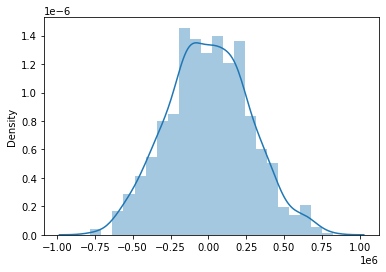

In [216]:
import seaborn as sns
sns.distplot(predictions-y_test)

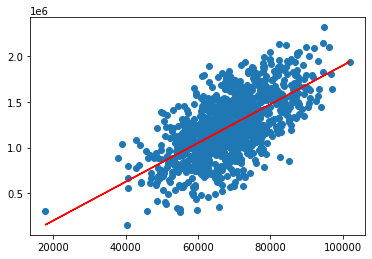

In [233]:
#Plotting the Best-fit Linear Regression Graph
plt.plot(x_test, predictions, color='red')
plt.scatter(x_test , y_test)

In [234]:
model.score(x_train,y_train)

0.4113955485962548

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test,predictions)


219728.3360181176

In [30]:
metrics.mean_squared_error(y_test,predictions)

74084394120.77266

In [31]:
# Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

272184.4854520049

In [32]:
# r2 score

In [33]:
from sklearn.metrics import r2_score

In [235]:
r2_score(y_test,predictions)

0.4006059806785851

# Using another independent variable

In [35]:
#target variable =Price
# Independent variable=Avg. Area House Age

In [36]:
x=data.iloc[:,1:2].values

In [37]:
x

array([[5.68286132],
       [6.00289981],
       [5.86588984],
       ...,
       [7.25059062],
       [5.53438842],
       [5.99230531]])

In [38]:
y=data.iloc[:,5:6].values

In [39]:
y

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
predictions=model.predict(x_test)
predictions

array([[1123700.04051816],
       [1130930.32234873],
       [1123801.66134854],
       [1240711.5337687 ],
       [1120222.55412252],
       [ 960147.59673382],
       [1486733.00017061],
       [1291290.89638172],
       [1033822.26449569],
       [1352136.05171715],
       [1102525.44799047],
       [ 993984.39933858],
       [1313998.6915338 ],
       [1184461.17898483],
       [1237927.72587681],
       [1135031.74297964],
       [ 985783.81816104],
       [ 947540.24382384],
       [1252847.12153721],
       [1085167.10545309],
       [ 961347.99137586],
       [1172224.94696357],
       [1288884.6691969 ],
       [1452363.64697759],
       [1328868.56631491],
       [1032251.25654734],
       [1137638.46023652],
       [1354201.88339044],
       [1157514.77285401],
       [1100691.57103282],
       [1568141.18855176],
       [1110344.46240349],
       [1455683.05352474],
       [1105329.7005048 ],
       [1163311.63597921],
       [1083042.69503833],
       [1197211.65936523],
 

In [43]:
y_test

array([[ 894251.0686],
       [ 932979.3606],
       [ 920747.9113],
       [ 691854.921 ],
       [ 732733.2363],
       [ 945252.1918],
       [ 624482.7636],
       [ 849566.0855],
       [1544379.748 ],
       [1535262.441 ],
       [ 568842.5356],
       [1137523.111 ],
       [2092949.861 ],
       [ 985749.7874],
       [1265180.909 ],
       [ 814240.2816],
       [ 998773.9973],
       [ 810537.1484],
       [ 978312.7484],
       [1535946.643 ],
       [1057252.583 ],
       [1031146.755 ],
       [1599634.465 ],
       [1086716.796 ],
       [1168845.815 ],
       [1192677.55  ],
       [1064371.764 ],
       [1377275.179 ],
       [1479295.571 ],
       [1182335.68  ],
       [1545864.166 ],
       [2105991.792 ],
       [ 809486.7099],
       [1464929.162 ],
       [1411054.317 ],
       [ 758262.6121],
       [1205114.23  ],
       [1684554.715 ],
       [1234629.595 ],
       [1295945.617 ],
       [1735340.256 ],
       [ 943854.7279],
       [1103485.707 ],
       [112

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

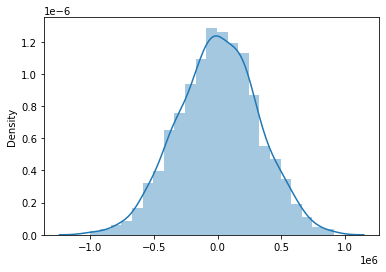

In [44]:
sns.distplot(predictions-y_test)

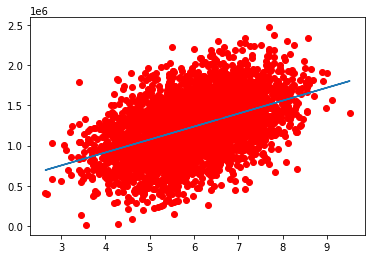

In [45]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train,model.predict(x_train))

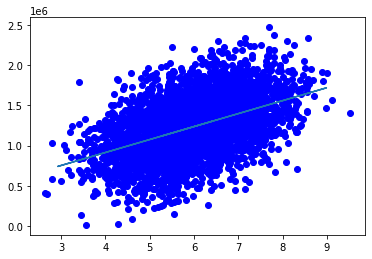

In [46]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test,model.predict(x_test))

In [236]:
model.score

-13126.202238772632

In [48]:
metrics.mean_absolute_error(y_test,predictions)

250905.68320890114

In [49]:
metrics.mean_squared_error(y_test,predictions)

98745342410.34053

In [50]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

314237.71640326775

In [51]:
metrics.r2_score(y_test,predictions)

0.20108184214726899

# Using multiple varaible

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [238]:
#features: independent variable=Avg. Area Income, Avg. Area House Age 
#target variable=Price

In [239]:
x1=data.iloc[:,0:2].values 
y1=data.iloc[:,5:6].values

In [240]:
x1

array([[7.95454586e+04, 5.68286132e+00],
       [7.92486424e+04, 6.00289981e+00],
       [6.12870672e+04, 5.86588984e+00],
       ...,
       [6.33906869e+04, 7.25059062e+00],
       [6.80013312e+04, 5.53438842e+00],
       [6.55105818e+04, 5.99230531e+00]])

In [241]:
y1

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

In [242]:
#split the data into train and test


In [243]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [244]:
model=LinearRegression()

In [245]:
model.fit(x_train,y_train)

LinearRegression()

In [246]:
predictions=model.predict(x_test)

In [247]:
predictions

array([[ 967707.75651561],
       [1021184.63366309],
       [1180173.60943329],
       [ 854073.41355806],
       [ 822797.88268322],
       [1149537.37606485],
       [ 966811.71573943],
       [1085563.14742736],
       [1509852.42168287],
       [1548422.56353842],
       [1111096.46253557],
       [1122314.25366408],
       [1809792.09424338],
       [1091150.19449047],
       [1278442.52567063],
       [ 831014.06846594],
       [1072845.66592398],
       [ 624022.40543679],
       [1427242.13842372],
       [1333039.04362345],
       [1118799.66246467],
       [1084061.5201086 ],
       [1317135.779454  ],
       [1181760.78244085],
       [1282855.25551348],
       [ 836033.38772698],
       [1230285.29081745],
       [1433908.35180898],
       [1430980.30234275],
       [1160255.478578  ],
       [1474691.10126839],
       [1559505.89445856],
       [ 929718.67853073],
       [1269267.41818323],
       [1238512.8492381 ],
       [1039804.79241747],
       [1129195.60356078],
 

In [248]:
y_test

array([[ 894251.0686],
       [ 932979.3606],
       [ 920747.9113],
       [ 691854.921 ],
       [ 732733.2363],
       [ 945252.1918],
       [ 624482.7636],
       [ 849566.0855],
       [1544379.748 ],
       [1535262.441 ],
       [ 568842.5356],
       [1137523.111 ],
       [2092949.861 ],
       [ 985749.7874],
       [1265180.909 ],
       [ 814240.2816],
       [ 998773.9973],
       [ 810537.1484],
       [ 978312.7484],
       [1535946.643 ],
       [1057252.583 ],
       [1031146.755 ],
       [1599634.465 ],
       [1086716.796 ],
       [1168845.815 ],
       [1192677.55  ],
       [1064371.764 ],
       [1377275.179 ],
       [1479295.571 ],
       [1182335.68  ],
       [1545864.166 ],
       [2105991.792 ],
       [ 809486.7099],
       [1464929.162 ],
       [1411054.317 ],
       [ 758262.6121],
       [1205114.23  ],
       [1684554.715 ],
       [1234629.595 ],
       [1295945.617 ],
       [1735340.256 ],
       [ 943854.7279],
       [1103485.707 ],
       [112

In [249]:
x_test

array([[6.12007262e+04, 5.29969400e+00],
       [6.33808147e+04, 5.34466404e+00],
       [7.12082693e+04, 5.30032605e+00],
       ...,
       [4.94242671e+04, 7.05347343e+00],
       [7.01385126e+04, 6.31945652e+00],
       [6.98355640e+04, 6.41984303e+00]])

In [250]:
p2=model.predict([[6.12007262e+04, 5.29969400e+00]])
p2

array([[967707.75694002]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

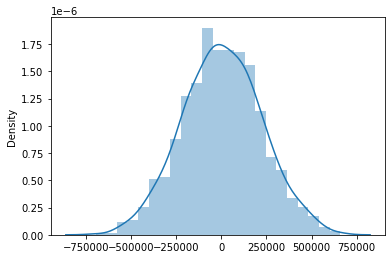

In [251]:
sns.distplot(predictions-y_test)

[]

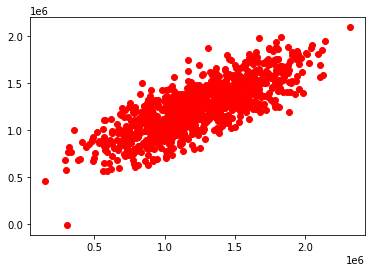

In [252]:
plt.scatter(y_test,predictions,color='red')
plt.plot()

In [68]:
model.score(x_train,y_train)

0.6162023234134015

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test,predictions)

175582.84518684636

In [71]:
metrics.mean_squared_error(y_test,predictions)

48062437588.67756

In [72]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

219231.47034282636

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.6111416177920193

In [74]:
#  Compare to linear model the accuracy of multiple linear regression model is good  so for us house pricing datasets multiple 
#  regression is better than linear model

# B.  Linear Regression On Cars Dataset

In [75]:
data=pd.read_csv(r"C:\Users\ds3\Downloads\cars_data (1).csv")

In [76]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [77]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [78]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [79]:
data1=data[['Engine HP','MSRP']]
data1
data1=pd.DataFrame(data1)

In [80]:
data1

,Engine HP,MSRP
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500
...,...,...
11909,300.0,46120
11910,300.0,56670
11911,300.0,50620
11912,300.0,50920


In [81]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Engine HP  11845 non-null  float64
 1   MSRP       11914 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 186.3 KB


In [82]:
data1.dtypes

Engine HP    float64
MSRP           int64
dtype: object

In [83]:
data1['Engine HP'].median()

227.0

In [84]:
data1['Engine HP']=data1["Engine HP"].fillna(data1['Engine HP'].median())

In [85]:
colnames=data1.columns

In [86]:
data1[colnames].isnull().sum()

Engine HP    0
MSRP         0
dtype: int64

In [87]:
#independent variable=HP
#target/dependent variable=Price

In [88]:
x=data1.iloc[:,0:1].values

y=data1.iloc[:,1:].values


In [89]:
x

array([[335.],
       [300.],
       [300.],
       ...,
       [300.],
       [300.],
       [221.]])

In [90]:
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
#Implement classifier based on Simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [93]:
predictions=(model.predict(x_test))

In [94]:
predictions

array([[50376.35988125],
       [24105.86633875],
       [91658.56401946],
       ...,
       [40994.04075893],
       [10970.6195675 ],
       [39117.57693446]])

In [95]:
y_test


array([[39460],
       [ 2107],
       [56260],
       ...,
       [53450],
       [23605],
       [26600]], dtype=int64)

In [96]:
x_test

array([[275.],
       [205.],
       [385.],
       ...,
       [250.],
       [170.],
       [245.]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

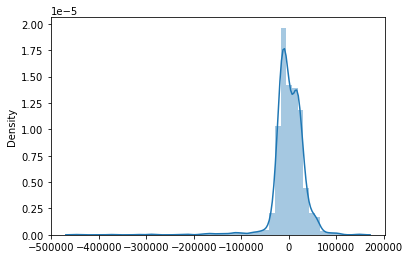

In [97]:
import seaborn as sns
sns.distplot(predictions-y_test)

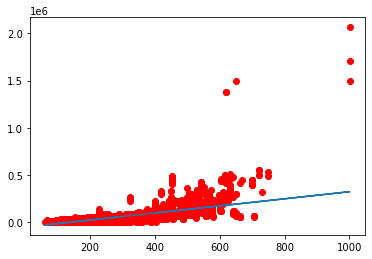

In [98]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

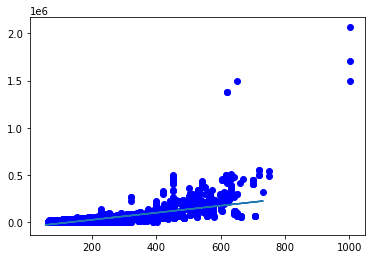

In [99]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, model.predict(x_test))

In [100]:
model.score(x_train,y_train)

0.42785224193006355

In [101]:
metrics.mean_absolute_error(y_test,predictions)

20986.0732352788

In [102]:
metrics.mean_squared_error(y_test,predictions)

1117397450.791388

In [103]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

33427.495431027855

In [104]:
r2_score(y_test,predictions)

0.5021675953061779

# Using another variable

In [105]:
# target variable=MSRP
# Independent variable=Engine Cylinder

In [106]:
data['Engine Cylinders'].median()

6.0

In [107]:
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())

In [108]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [109]:
x=data.iloc[:,5:6].values
x

array([[6.],
       [6.],
       [6.],
       ...,
       [6.],
       [6.],
       [6.]])

In [110]:
y=data.iloc[:,15:].values
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [113]:
prediction=(model.predict(x_test))
prediction

array([[47586.80926812],
       [47586.80926812],
       [84551.29524614],
       ...,
       [10622.3232901 ],
       [10622.3232901 ],
       [10622.3232901 ]])

In [114]:
y_test

array([[39460],
       [ 2107],
       [56260],
       ...,
       [53450],
       [23605],
       [26600]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

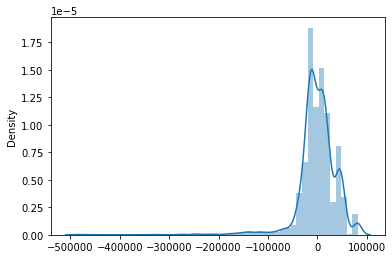

In [115]:
sns.distplot(prediction-y_test)

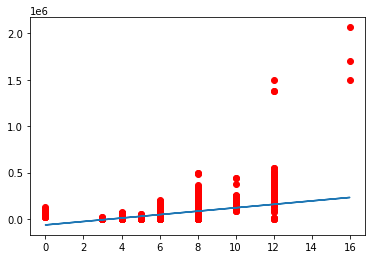

In [116]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [117]:
model.score(x_train,y_train)

0.2757718279497916

In [118]:
metrics.mean_absolute_error(y_test,prediction)

25442.59409007171

In [119]:
metrics.mean_squared_error(y_test,prediction)

1516141971.1603987

In [120]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

38937.66776734835

In [121]:
metrics.r2_score(y_test,prediction)

0.32451554921174874

# using multiple variables

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [123]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041459,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779255,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041459,0.779255,1.000000,-0.139752,-0.600947,-0.565124,0.040815,0.531139
Number of Doors,0.263787,-0.102713,-0.139752,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.600947,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.565124,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.040815,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531139,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [124]:
data3=data[['Engine Cylinders','Year','Engine HP','MSRP']]

In [125]:
data3

,Engine Cylinders,Year,Engine HP,MSRP
0,6.0,2011,335.0,46135
1,6.0,2011,300.0,40650
2,6.0,2011,300.0,36350
3,6.0,2011,230.0,29450
4,6.0,2011,230.0,34500
...,...,...,...,...
11909,6.0,2012,300.0,46120
11910,6.0,2012,300.0,56670
11911,6.0,2012,300.0,50620
11912,6.0,2013,300.0,50920


In [126]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine Cylinders  11914 non-null  float64
 1   Year              11914 non-null  int64  
 2   Engine HP         11845 non-null  float64
 3   MSRP              11914 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 372.4 KB


In [127]:
data3.isnull().sum()

Engine Cylinders     0
Year                 0
Engine HP           69
MSRP                 0
dtype: int64

In [128]:
data3['Engine Cylinders'].mean()

5.629763303676347

In [129]:
data3['Engine Cylinders']=data3['Engine Cylinders'].fillna(data3['Engine Cylinders'].mean())

C:\Users\ds3\AppData\Local\Temp\ipykernel_12916\345709413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Engine Cylinders']=data3['Engine Cylinders'].fillna(data3['Engine Cylinders'].mean())


In [130]:
data3['Engine HP'].mean()

249.38607007176023

In [131]:
data3['Engine HP']=data3['Engine HP'].fillna(data3['Engine HP'].mean())

C:\Users\ds3\AppData\Local\Temp\ipykernel_12916\1757865664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Engine HP']=data3['Engine HP'].fillna(data3['Engine HP'].mean())


In [132]:
#Independents variables=Engine Cylinders  ,Year ,Engine HP 
# Target variable=MSRP

In [133]:
x=data3.iloc[:,0:3].values
y=data3.iloc[:,3:].values

In [134]:
x

array([[   6., 2011.,  335.],
       [   6., 2011.,  300.],
       [   6., 2011.,  300.],
       ...,
       [   6., 2012.,  300.],
       [   6., 2013.,  300.],
       [   6., 2006.,  221.]])

In [135]:
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [137]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=(model.predict(x_test))

In [138]:
prediction

array([[51327.30193647],
       [24972.36529423],
       [93887.84978669],
       ...,
       [37486.20749459],
       [10177.32267247],
       [35932.00898586]])

In [139]:
y_test

array([[39460],
       [ 2107],
       [56260],
       ...,
       [53450],
       [23605],
       [26600]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

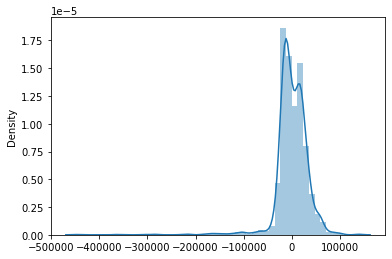

In [140]:
sns.distplot(prediction-y_test)

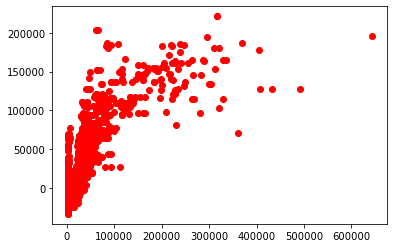

In [141]:
plt.scatter(y_test,prediction,color='red')

In [142]:
model.score(x_train,y_train)

0.42989588514998045

In [143]:
metrics.mean_absolute_error(y_test,prediction)

21418.52541636006

In [144]:
metrics.mean_squared_error(y_test,prediction)

1111266899.8783789

In [145]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

33335.67008293637

In [146]:
r2_score(y_test,prediction)

0.5048989304286624

In [147]:
#  In car datasets when i formed the linear model with single independent variable then from r2_score of models it is 
#  clear that the 'Engine HP' of the car are more corrleted with the MSRP of the car than other independent variable
#  &
#  when i formed multiple l model taking ('Year','No of Cylinders','Engine HP') AS independent variable and MSRP as target then
#  i conclude that the accuracy of multiple linear regression model and the Linear regression model('Taking Engine HP as 
#  Independent variable') are appropximately same.


# C. Multiple Regression On 50_Startups Dataset

In [148]:
data=pd.read_csv(r"C:\Users\ds3\Downloads\50_Startups.csv")

In [149]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [151]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [152]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [153]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [154]:
# features   Target variable=Profit
# independent variable=R&D Spend, Marketing Spend

In [155]:
x=data.iloc[:,0:3].values

In [156]:
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [157]:
y=data.iloc[:,4:].values

In [158]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [160]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=(model.predict(x_test))
prediction

array([[103901.8969696 ],
       [132763.05993126],
       [133567.90370044],
       [ 72911.78976736],
       [179627.92567224],
       [115166.64864795],
       [ 67113.5769057 ],
       [ 98154.80686776],
       [114756.11555221],
       [169064.01408795]])

In [161]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

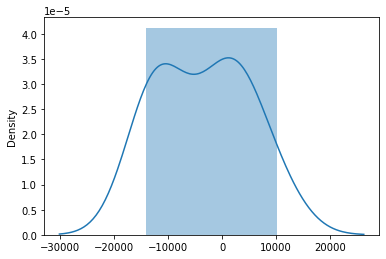

In [162]:
sns.distplot(prediction-y_test)

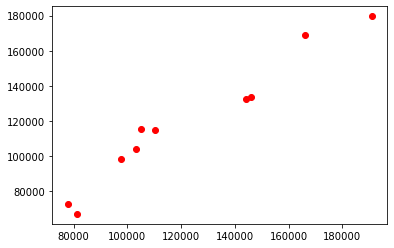

In [163]:
plt.scatter(y_test,prediction,color='red')

In [164]:
from sklearn import metrics

In [165]:
metrics.mean_absolute_error(y_test,prediction)

7320.441614848123

In [166]:
metrics.mean_squared_error(y_test,prediction)

77506468.16885388

In [167]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

8803.77579046933

In [168]:
metrics.r2_score(y_test,prediction)

0.9393955917820572

In [169]:
model.score(x_train,y_train)

0.9499572530324031

In [170]:
model.score(x_test,y_test)

0.9393955917820572

# selecting different features

In [171]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [172]:
#  Target variable= Profit
#   Independent Variable= R & D spend  and Marketing spend 

In [173]:
data1=data[['R&D Spend','Marketing Spend','Profit']]

In [174]:
data1

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [175]:
x=data1.iloc[:,0:2].values
x

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [

In [176]:
y=data1.iloc[:,2:].values
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [178]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=(model.predict(x_test))
prediction

array([[102284.64605183],
       [133873.92383812],
       [134182.1495165 ],
       [ 73701.1069363 ],
       [180642.25299736],
       [114717.24903894],
       [ 68335.07575312],
       [ 97433.45922275],
       [114580.92136452],
       [170343.31979498]])

In [179]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

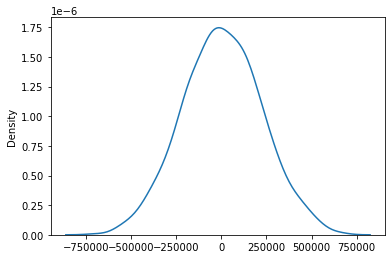

In [254]:
sns.distplot(predictions-y_test , hist = False)

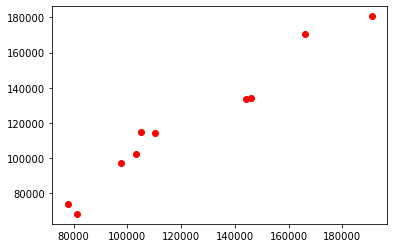

In [181]:
plt.scatter(y_test,prediction,color='red')

In [182]:
model.score(x_train,y_train)

0.9496654854268443

In [183]:
model.score(x_test,y_test)

0.9474386447268489

In [184]:
metrics.mean_absolute_error(y_test,prediction)

6886.594588246504

In [185]:
metrics.mean_squared_error(y_test,prediction)

67220275.37568113

In [186]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

8198.797190788484

In [187]:
metrics.r2_score(y_test,prediction)

0.9474386447268489

In [188]:
#  In the first model I took 	R&D Spend	Administration	Marketing Spend as independent variable 
#  and Profit as Target Variable and In the second model I took 'R&D Spend','Marketing Spend' as independent variable and 
#  Profit as a target variable  from the both model I realize that the 'Administration' variable not affect the target variable
#  much more.
#  So both the models are good for data